# Plotting shots

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [18]:
%matplotlib inline

### Opening the dataset

La prima cosa da fare è aprire i dati. Utilizziamo un parser Sbopen disponibile in mplsoccer. Utilizzando il metodo event e mettendo come parametro l'id della partita, carichiamo i dati. I dati dell'evento, su cui ci concentreremo, sono memorizzati in un dataframe df. Da questo dataframe estraiamo i nomi delle due squadre. Poi filtriamo il dataframe in modo che rimangano solo i tiri.

In [19]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

In [20]:
team1, team2 = df.team_name.unique()

In [21]:
shots = df.loc[df['type_name']== 'Shot'].set_index('id')

### Shots Map

Per prima cosa disegniamo il campo da gioco usando la classe MPL Soccer.

In questo esempio, impostiamo le variabili per la lunghezza e la larghezza del campo sul sistema di coordinate di Statsbomb (che usa le iarde). Per saperne di più sui diversi sistemi di coordinate, si può leggere qui

Ora, iteriamo tutti i tiri della partita. Prendiamo le coordinate x e y, il nome della squadra e l'informazione se è stato segnato un gol. Se è stato segnato, tracciamo un cerchio solido con il nome del giocatore, altrimenti un cerchio transparente (il parametro alfa regola la transparenza). Per avere i tiri dell'Inghilterra in una metà campo e quelli della Svezia nell'altra metà, sottraiamo x e y dalla lunghezza e dall'altezza del campo.

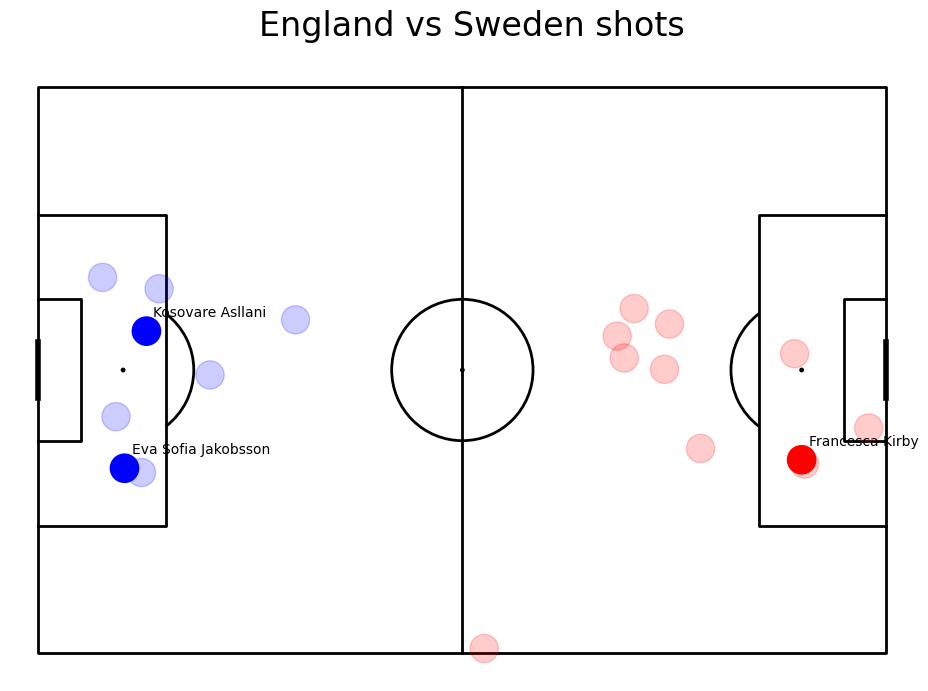

In [24]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

for i, shot in shots.iterrows():
    x = shot['x']
    y = shot['y']
    goal = shot['outcome_name'] == 'Goal'
    team_name = shot['team_name']
    circle_size = 2
    
    if (team_name == team1): #England
        if goal:
            shotCircle = plt.Circle((x,y), circle_size, color = 'red')
            plt.text(x+1, y-2, shot['player_name'])
        else:
            shotCircle = plt.Circle((x,y), circle_size, color = 'red')
            shotCircle.set_alpha(.2)
            
    if (team_name == team2): #Sweden
        if goal:
            shotCircle = plt.Circle((pitchLengthX-x,pitchWidthY-y), circle_size, color = 'blue')
            plt.text(pitchLengthX-x+1, pitchWidthY-y-2, shot['player_name'])
        else:
            shotCircle = plt.Circle((pitchLengthX-x,pitchWidthY-y), circle_size, color = 'blue')
            shotCircle.set_alpha(.2)
            
    ax.add_patch(shotCircle)
    
fig.suptitle('England vs Sweden shots', fontsize = 24)
fig.set_size_inches(10,7)
plt.show()

## Alternativa usando sempre la classe Pitch di mplsoccer

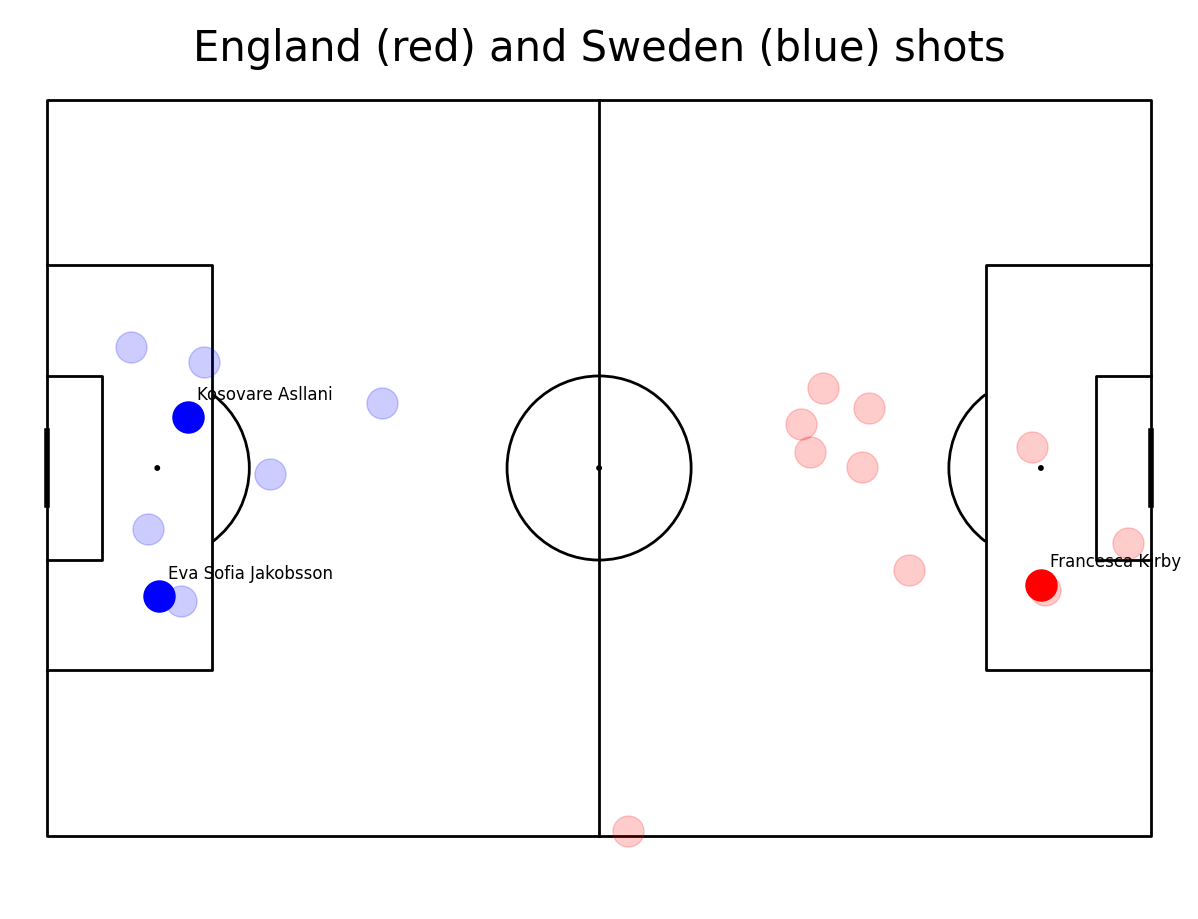

In [25]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)
plt.show()

## Plotting shots di una metà campo

Per tracciare i tiri di una sola squadra in una metà campo, si usa la classe VerticalPitch(). Se si imposta half su True, verrà tracciata solo una metà del campo. È un bel modo di tracciare i tiri, dato che raramente si verificano nella metà campo difensiva. Questa volta tracciamo tutti i tiri in una volta sola, senza passare attraverso il dataframe.

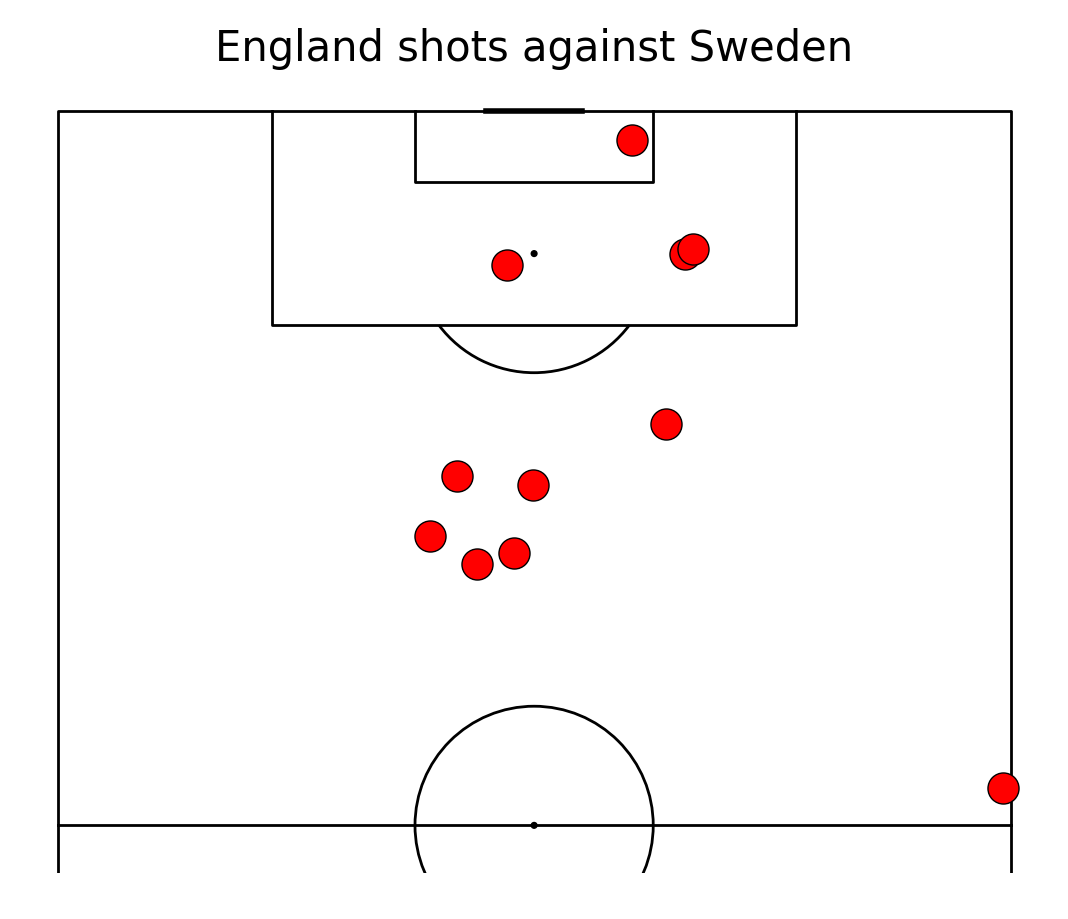

In [26]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")
fig.suptitle("England shots against Sweden", fontsize = 30)
plt.show()

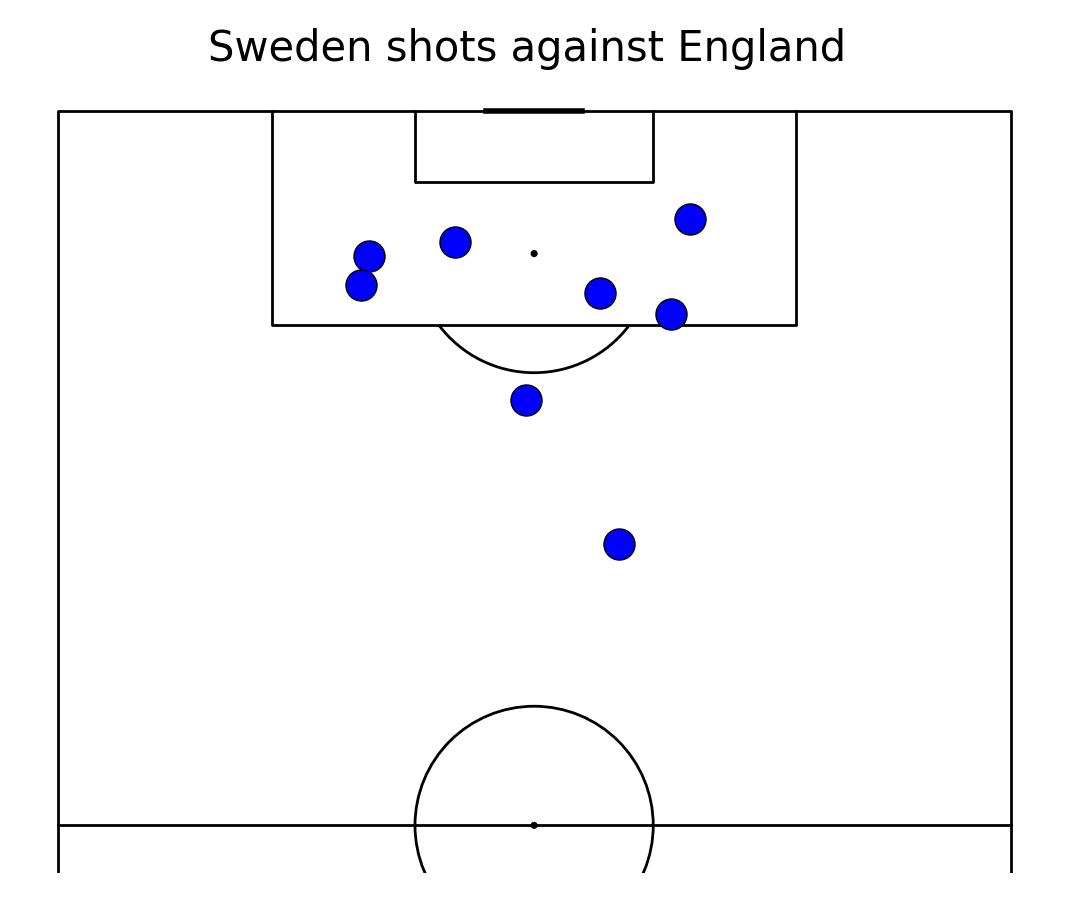

In [27]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_sweden.x, df_sweden.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'], edgecolors="black")
fig.suptitle("Sweden shots against England ", fontsize = 30)
plt.show()

### Challenge

**1**.Plot the start point of every Sweden pass. Attacking left to right.

**2**.Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)

**3**.Plot arrows to show where the passes went to.

In [39]:
df_1, related, freeze, tactics = parser.event(69301)
passes = df_1.loc[df_1['type_name'] == 'Pass'].set_index('id')
pass_seger = passes.loc[passes['player_name'] == 'Sara Caroline Seger']

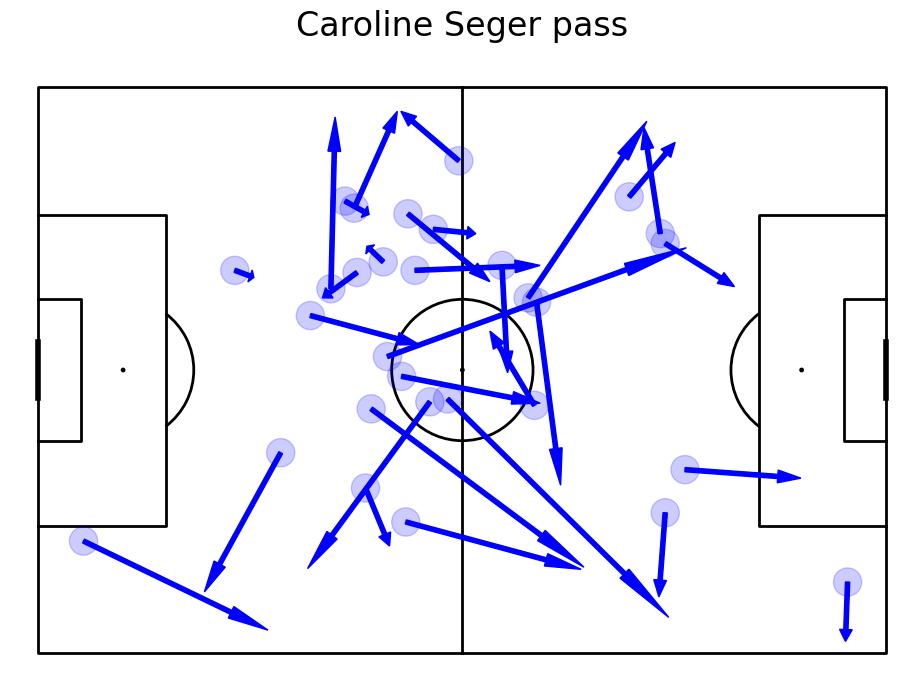

In [45]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

for i, pass_1 in pass_seger.iterrows():
    x = pass_1['x']
    y = pass_1['y']
    
    passCircle = plt.Circle((x,y), circle_size, color = 'blue')
    passCircle.set_alpha(.2)
    ax.add_patch(passCircle)
    dx=pass_1['end_x']-x
    dy=pass_1['end_y']-y

    passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
    ax.add_patch(passArrow)   
            
    
fig.suptitle('Caroline Seger pass', fontsize = 24)
fig.set_size_inches(10,7)
plt.show()